# How to Use TensorFlow

In [24]:
## Import required libraries
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [26]:
## Set the seed using keras.utils.set_random_seed. This will set:
## 1) `numpy` seed
## 2) backend random seed
## 3) `python` random seed
## Models have kernel_initializer and bias_initializer parameters for
## initializing the weights and biases, respectively.
## Since we set random seeds using keras.utils.set_random_seed in the beginning of the notebook, 
## the initializers will produce same results in the sequential runs.
##
## However, it does not make parallel runs (such as TensorFlow GPU operations) deterministic. 
## If TensorFlow is utilizing GPUs that have thousands of hardware 
## threads, it can cause non-deterministic behavior to occur.
## We can make the TensorFlow behaviour deterministic using:
## 'tf.config.experimental.enable_op_determinism()'.
##
## Still there could be inconsistencies, for example, due to different numerical
## approximations performed by different computer hardware or different system configurations.
##
## Not to mention that making TensorFlow GPU operations deterministic takes away a
## lot of flexibility which can affect TensorFlow's efficiency, for example, it
## may require longer runtime.
##
## Summary:
## Whether the code will give exactly the same result in every run is subjective to a lot of factors.
## However, 'keras.utils.set_random_seed()' eliminates a few factors and increases the chance of
## reproducibility of the result.
##
## Ref: https://keras.io/examples/keras_recipes/reproducibility_recipes/
##
keras.utils.set_random_seed(812)

In [28]:
## Set global parameters for plots
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

## Load the Fashion MNIST Dataset

Xiao et al. created the Fashion MNIST dataset in 2017 for benchmarking machine learning algorithms \[R1\].  
The word 'MNIST' refers to an older benchmark dataset called the 'Modified National Institute of Standards and Technology' dataset.  

The Fashion MNIST dataset contains 70,000 images from zalando.com which is a European fashion company specialized in clothing and accessories \[R2\].

\[R1\] Han Xiao, Kashif Rasul, Roland Vollgraf. 'Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms'.  
https://doi.org/10.48550/arXiv.1708.07747  

\[R2\] https://github.com/zalandoresearch/fashion-mnist


In [30]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
## Each image contains (28 by 28) pixels
print(train_images.shape)
print(f'No. of training images: {len(train_labels)}')

(60000, 28, 28)
No. of training images: 60000


In [6]:
print(test_images.shape)
print(f'No. of test images: {len(test_labels)}')

(10000, 28, 28)
No. of test images: 10000


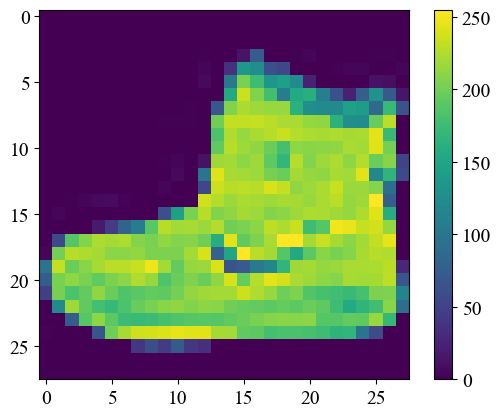

In [36]:
## Display the first training image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.savefig('Images/nikeAnkleBoot.jpg')
plt.show()

In [6]:
## Extract the class label of the first training image
lbl = train_labels[0]
category = class_names[lbl]
print(category)

Ankle boot


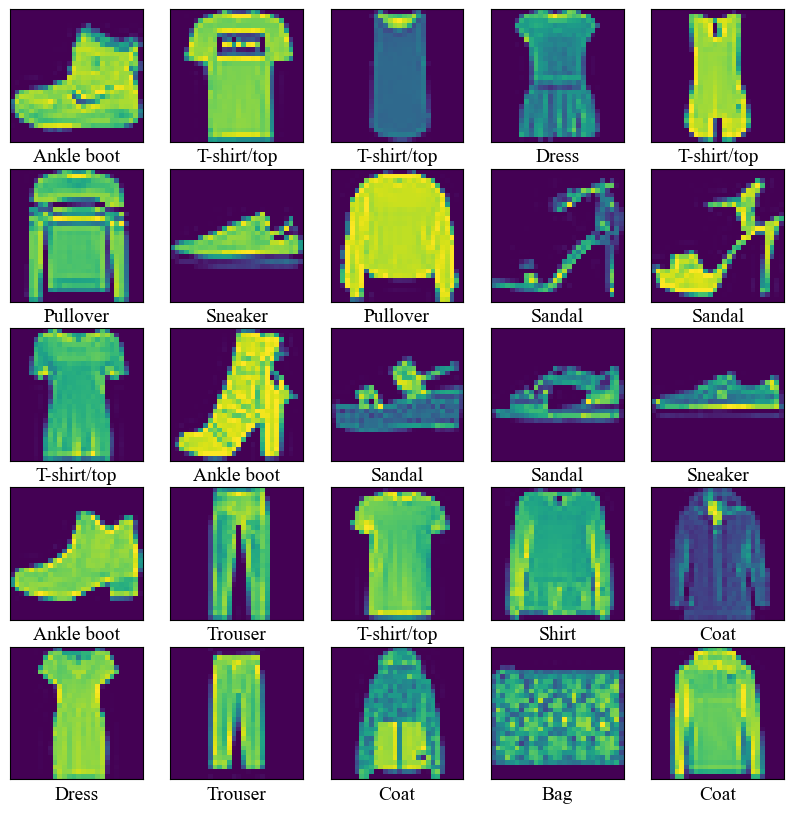

In [9]:
## Display the first 25 training images along with their class labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Initialise a Model

In [8]:
## Let us utilise a 'multilayer perceptron' (MLP) model for this classification task.
## MLP was developed by Frank Rosenblatt in 1958.
## As the name suggests, an MLP model consists of multiple layers of perceptrons or
## artificial neurons.
## Here, we initilise a simple MLP model with three layers:
## 1) one input layer with only one neuron or node,
## 2) one hidden layer with 128 nodes, and
## 3) one output layer with 10 nodes.
##
## The node in the input layer takes a (28 x 28) matrix (i.e. one image at a time) as input and 
## produces a flattened (1 x 784) vector as output.
##
## Each node in the hidden layer uses the ReLU activation function.
## The ReLU function is relu(x) = max(0, x).
## That means the relu function returns zero if the input is negative, otherwise it outputs the inputted value.
##
## A node in the output layer does not have any activation function.
##
## The hidden and output layers are 'dense' layers or 'fully connected' layers.
## It means that each node in these layers are connected to all the nodes in the preceding layer.
##
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [9]:
## Compile i.e. configure the MLP model.
## Use the 'adaptive moment estimation' (Adam) optimizer to update the weight and bias of each node.
## Ref: https://www.geeksforgeeks.org/deep-learning/adam-optimizer/
##
## Use the 'sparse categorical cross entropy' function as the loss function to calculate the loss at the output layer
## for each input image.
## Apply this function on the 'logits' i.e. the raw vector outputted by the output layer.
## Using this function, calculate the sparse categorical cross entropy between the true class label vector and the logits.
## Please note that the loss function is only applied at the output layer, not at the hidden layer.
## Ref: https://www.geeksforgeeks.org/deep-learning/categorical-cross-entropy-in-multi-class-classification/
##
## Evaluate the metrics 'accuracy' after each epoch of training and print its value.
##
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile
https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
https://developers.google.com/machine-learning/glossary#logits

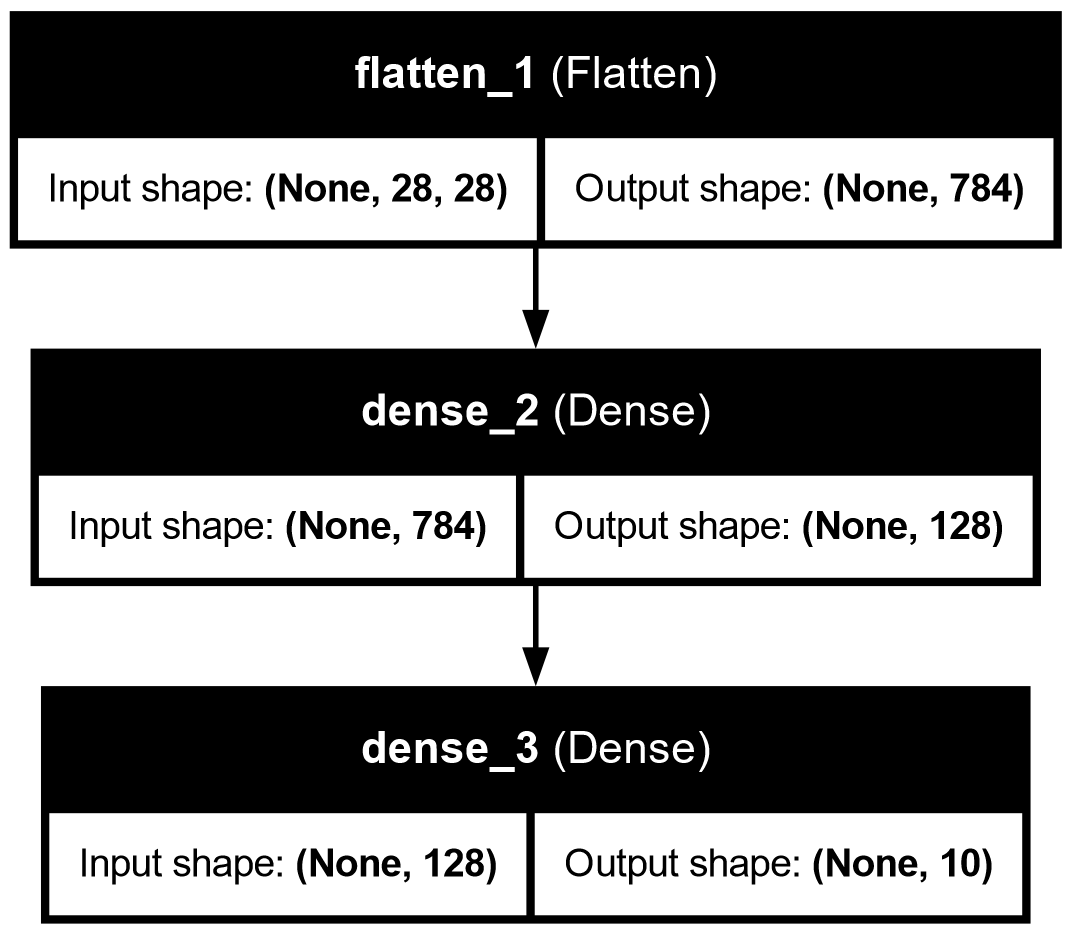

In [10]:
## Plot the model architecture
plot_model(model, show_shapes=True, show_layer_names=True)

## Train the Model

In [11]:
## Train the model for two 'epochs'.
## When a model has been trained with all the training samples for the first time,
## it is said that the first 'epoch' is completed.
## If we retrain the model with all of the same training samples once again, it is 
## said that the second 'epoch' is completed.
##
# model.fit(train_images, train_labels, epochs=10)
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7261 - loss: 2.4501 
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7806 - loss: 0.6184


<table>
  <tr><td>
    <img src="Images/MLP_fwdProp_fig.jpg"
         alt="MLP Forward Propagation"  width="1100">
  </td></tr>
  <tr><td align="center">
    <!--<b>Figure 1.</b> The Forward Propagation during the Training of a Multilayer Perceptron (MLP).<br/>&nbsp;-->
      <b>Figure 'MLP Forward Propagation'.</b> The Forward Propagation during the Training of a Multilayer Perceptron (MLP).<br/>&nbsp;
  </td></tr>
</table>

<table>
  <tr><td>
    <img src="Images/MLP_backProp_fig.jpg"
         alt="MLP Backpropagation"  width="1100">
  </td></tr>
  <tr><td align="center">
    <!--<b>Figure 1.</b> The Forward Propagation during the Training of a Multilayer Perceptron (MLP).<br/>&nbsp;-->
      <b>Figure 'MLP Backpropagation'.</b> The Backpropagation during the Training of a Multilayer Perceptron (MLP).<br/>&nbsp;
  </td></tr>
</table>

**Q. What is the intuition behind the formula of $\delta_{h, j}$ as specified in the Figure 'MLP Backpropagation'?**  
Ans.  
$w_{j, k}$ is the weight of the edge from neuron $H_j$ to neuron $O_k$.  
$\delta_{o, k}$ is the loss or error at neuron $O_k$.  
This error must be a result of the errors occurred in the previous layer i.e. at the hidden-layer neurons.  
Therefore, the error $\delta_{h, j}$ at the hidden-layer node $H_j$ must be a contributing factor behind $\delta_{o, k}$.  
In order to estimate $\delta_{h, j}$, we simply multiply the error $\delta_{o, k}$ with the corresponding edge weight $w_{j, k}$ for all values of k.  
Additionally, we have to consider whether neuron $H_j$ had actually fired or not during the forward propagation.  
If it had not fired in the first place then it would not contribute to the error of neuron $O_k$.  
In order to figure out whether neuron $H_j$ had fired or not, we include the part $\frac{d(relu(a_j))}{da_j}$.  
Thus, the formula becomes $\delta_{h, j} = \frac{d(relu(a_j))}{da_j} * \sum_{k=1}^{10}{(w_{j,k}.\delta_{o,k})}$.

**Q. What is the intuition behind the MLP model?**  
Ans.  
Actually, the 128 neurons in the hidden layer are employed to capture 128 features with which we can classify the input images.  
For example, after training, the first hidden-layer node $H_1$ might learn to look for curves in the middle pixels of  
the input image (Figure 'Ankle Boot') i.e. the elements in the middle of the input image vector $X$.  
Hence, after training, only the middle elements of the weight vector of neuron $H_1$ might have non-zero entries.
Additionally, the non-zero entries would be such that their product with the image vector $X$ would produce a positive value only when  
there is a curve in the middle of $X$.  
Thus, we can assign as many neurons in the hidden layer as many features we wish to learn.

<table>
  <tr><td>
    <img src="Images/nikeAnkleBoot.jpg"
         alt="Nike Ankle Boot"  width="600">
  </td></tr>
  <tr><td align="center">
      <b>Figure 'Ankle Boot'.</b> Learning Identifying Features of Ankle Boots.<br/>
      Through training, the MLP model might learn that the curve near the middle of an ankle boot is a salient feature of ankle boots.<br/>&nbsp;
  </td></tr>
</table>

In [14]:
print(model.layers)
print(f'This model has {len(model.layers)} layers')

[<Flatten name=flatten_1, built=True>, <Dense name=dense_2, built=True>, <Dense name=dense_3, built=True>]
This model has 3 layers


In [15]:
model.layers[0].get_weights()

[]

In [16]:
type(model.layers[1].get_weights())

list

In [24]:
len(model.layers[1].get_weights())

2

In [27]:
wts = model.layers[1].get_weights()
print(type(wts))
print(len(wts))
print(wts[0].shape)
print(wts[0])
print(len(wts[0]))
print(len(wts[0][0]))

print(wts[1].shape)

<class 'list'>
2
(784, 128)
[[ 0.05767564  0.04151539  0.05201904 ... -0.07220399 -0.04253034
  -0.02184147]
 [ 0.01668926 -0.06592903 -0.05889969 ... -0.07715374  0.06939922
  -0.08210459]
 [-0.00615178  0.06595006 -0.06194866 ...  0.06135555  0.06390895
   0.07445126]
 ...
 [-0.06878117 -0.07132551  0.03285407 ...  0.01803922  0.06308654
  -0.00438708]
 [ 0.0006316  -0.07533892 -0.07438333 ... -0.05079644 -0.09297955
   0.06295764]
 [-0.06338941 -0.06922681  0.00473981 ... -0.00165986  0.11711925
  -0.04066497]]
784
128
(128,)


In [30]:
wts = model.layers[2].get_weights()
print(type(wts))
print(len(wts))
print(wts[0].shape)
print(wts[0])
print(len(wts[0]))
print(len(wts[0][0]))
print(wts[0][0])

print(wts[1].shape)
print(wts[1])

<class 'list'>
2
(128, 10)
[[ 0.00502298  0.12849066  0.03927772 ... -0.04743064 -0.1452863
   0.06068655]
 [-0.16156419 -0.09870002  0.07726932 ...  0.0406813   0.05799953
  -0.1775623 ]
 [ 0.1027324   0.14672261 -0.00872665 ... -0.20054811 -0.07357109
   0.05300929]
 ...
 [ 0.12854953  0.0959047   0.01250833 ... -0.08273491 -0.116162
  -0.061655  ]
 [ 0.10121399  0.0987436   0.09187045 ... -0.00829669  0.091291
   0.00397429]
 [ 0.0239055  -0.13779637 -0.12473244 ... -0.18548822 -0.17138584
  -0.13419023]]
128
10
[ 0.00502298  0.12849066  0.03927772  0.0394312  -0.19929783  0.17761523
 -0.14735527 -0.04743064 -0.1452863   0.06068655]
(10,)
[ 0.08521236  0.03072547  0.32425854 -0.02894918 -0.31566575 -0.20172767
  0.5321097  -0.2798403   0.11105242 -0.6742829 ]


## Test the Model

In [31]:
## Append a softmax layer to the model.
## In other words, add a softmax layer after the output layer in the model.
## The output layer has 10 nodes.
## Each of these nodes outputs a scalar.
## As a result, the output of the output layer becomes a row vector of length 10 i.e. a 10-row vector.
## This raw output vector is called 'logits' [R1].
##
## The softmax layer will take the logits as input and apply the softmax() function on it.
## The softmax() function will convert the logits into a probability distribution.
## The probability distribution will again be a 10-row vector.
## However, each element will be a probability value in the range [0, 1].
## Moreover, the sum of all the elements will be 1.
## The i-th element will represent the probability that the input image belongs to the i-th class.
## In other words, the i-th element represents the model's 'confidence' that the input image belongs to the i-the class.
##
## References:
## [R1] https://developers.google.com/machine-learning/glossary#logits
##
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [32]:
## Predict the class labels of all the test images
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [17]:
type(test_images)

numpy.ndarray

In [18]:
len(test_images)

10000

In [19]:
type(predictions)

numpy.ndarray

In [20]:
len(predictions)

10000

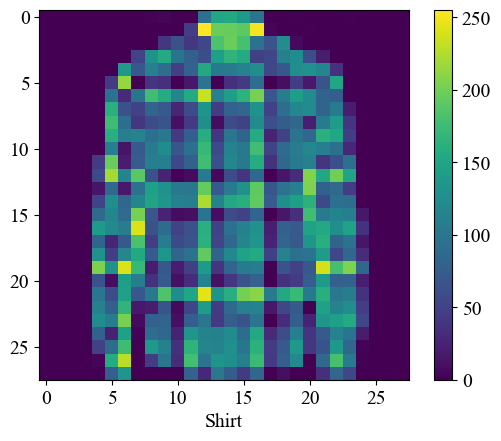

In [33]:
## Display the eighth test image along with its true class label
item_no = 7
plt.figure()
plt.imshow(test_images[item_no])
plt.xlabel(class_names[test_labels[item_no]])
plt.colorbar()
plt.grid(False)
plt.show()

In [34]:
## Print the true class label ID
print(test_labels[item_no])

6


In [35]:
## Print the true class label
print(class_names[6])

Shirt


<table>
  <tr><td>
    <img src="Images/MLP_pred_fig.jpg"
         alt="MLP Prediction"  width="1100">
  </td></tr>
  <tr><td align="center">
    <!--<b>Figure 1.</b> The Forward Propagation during the Training of a Multilayer Perceptron (MLP).<br/>&nbsp;-->
      <b>Figure.</b> The Prediction of a Multilayer Perceptron (MLP).<br/>&nbsp;
  </td></tr>
</table>

In [36]:
## Print the class-wise confidence scores for the given item.
## The i-th element represents the model's confidence that the given item belongs to the i-th class.
predictions[item_no]

array([4.61872574e-03, 6.00716121e-05, 1.10365346e-01, 5.03454320e-02,
       4.61942613e-01, 1.56307349e-03, 3.56284767e-01, 6.82244718e-07,
       1.48192560e-02, 8.95150100e-12], dtype=float32)

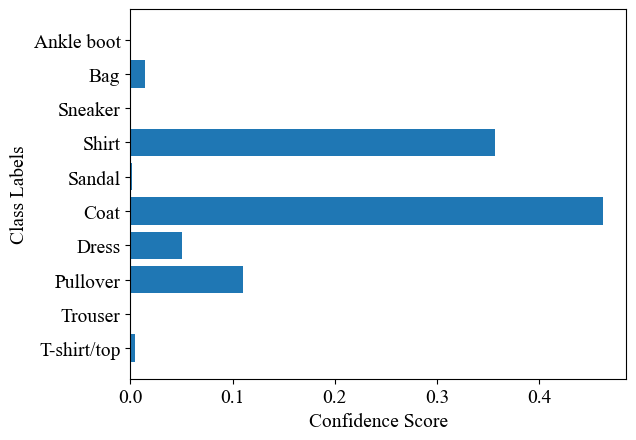

In [37]:
plt.barh(class_names, predictions[item_no])
plt.ylabel("Class Labels")
plt.xlabel("Confidence Score")
plt.show()

Our model has the highest confidence in the belief that the given item is a coat.  
Our model has the second highest confidence in the belief that the given item is a shirt, and so on.  
As a result, our model predicts that the given item is a coat.

In [39]:
## Print the predicted class ID along with the class label
pred_class_id = np.argmax(predictions[item_no])
print(pred_class_id)
print(class_names[pred_class_id])

4
Coat


It is an incorrect prediction since the given item is actually a shirt.

In [40]:
## Quantify the prediction accuracy across all the items
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - 6ms/step - accuracy: 0.7775 - loss: 0.6528

Test accuracy: 0.7774999737739563


Therefore, our model is able to correctly identify 77.75% of the items.

**References:**      
- https://www.w3schools.com/ai/ai_tensors.asp   
- https://www.tensorflow.org/tutorials/keras/classification  
- Section 3.2.1 'The Multi-Layer Perceptron Algorithm', Stephen Marsland (2015), Machine Learning: An Algorithmic Perspective, Second Edition, CRC Press.
- https://www.geeksforgeeks.org/deep-learning/multi-layer-perceptron-learning-in-tensorflow/  
- A video titled 'The Stilwell Brain' by the Vsauce Youtube Channel: https://www.youtube.com/watch?v=rA5qnZUXcqo